<a href="https://colab.research.google.com/github/yewon-hong-ewha/ESAA-24-1/blob/main/0405_%EA%B3%BC%EC%A0%9C_%ED%8C%8C%EB%A8%B8%EC%99%84_CH8_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

과제: 파이썬 머신러닝 완벽 가이드 ch8. 6, 8-9 pg. 512-516, 529-543

마감: 4월 8일(월) 18:30

필사하여 깃허브 업로드 후 링크를 제출해주세요.

# Ch8. 텍스트 분석

## 06. 토픽 모델링(Topic Modeling) - 20 뉴스 그룹

토픽 모델링 : 문서 집합에 숨어있는 주제를 찾아내는 것.
- 사람이 수행하는 토픽 모델링은 더 함축적인 의미로 문장을 요약하는 것에 반해, 머신러닝 기반의 토픽 모델은 숨겨진 주제를 효과적으로 표현할 수 있는 중심 단어를 함축적으로 추출한다.

- LSA (Latent Semantic Analysis) : 머신러닝 기반의 토픽 모델링에 자주 사용되는 기법.
- 이 절에서는 LDA (Latent Dirichlet Allocation)만을 이용해 토픽 모델링을 수행한다. (차원축소의 LDA와는 다른 알고리즘임을 주의)
----------------

1. LDA 토픽 모델링을 위해 fetch_20newsgroup() API는 categories 파라미터를 통해 필요한 주제만 필터링해 추출한다.
2. 추출된 텍스트를 Count 기반으로 벡터화 변환한다.
3. max_features : word 피처의 개수를 지정

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# 모토사이클, 야구, 그래픽스, 윈도우즈, 중동, 기독교, 전자공학, 의학 8개 주제를 추출
cats = ['rec.motorcycles', 'rec.sport.baseball', 'comp.graphics', 'comp.windows.x',
        'talk.politics.mideast', 'soc.religion.christian', 'sci.electronics', 'sci.med']

# 위에서 cats 변수로 기재된 카테고리만 추출. fetch_20newsgroups()의 categories에 cats 입력
news_df = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'),
                              categories=cats, random_state=0)

# LDA는 Count 기반의 벡터화만 적용합니다.
count_vect = CountVectorizer(max_df=0.95, max_features=1000, min_df=2,
                             stop_words = 'english', ngram_range=(1, 2))
feat_vect = count_vect.fit_transform(news_df.data)
print('CountVectorizer Shape : ', feat_vect.shape)

CountVectorizer Shape :  (7862, 1000)


CountVectorizer의 객체 변수인 feat_vect는 7862개의 문서가 1000개의 피처로 구성된 행렬 데이터이다. 이렇게 피처 벡터화된 데이터 세트를 기반으로 LDA 토픽 모델링을 수행한다.

In [ ]:
lda = LatentDirichletAllocation(n_components=8, random_state=0)
lda.fit(feat_vect)

LatentDirichletAllocation(n_components=8, random_state=0)

이를 수행하면 LatentDirichletAllocation 객체는 components_ 속성값을 갖게 된다. components_는 개별 토픽별로 각 word 피처가 얼마나 많이 그 토픽에 할당됐는지에 대한 수치를 갖는다. 높은 값일수록 해당 word 피처는 그 토픽의 중심 word가 된다.

In [ ]:
print(lda.components_.shape)
lda.components_

(8, 1000)


array([[3.60992018e+01, 1.35626798e+02, 2.15751867e+01, ...,
        3.02911688e+01, 8.66830093e+01, 6.79285199e+01],
       [1.25199920e-01, 1.44401815e+01, 1.25045596e-01, ...,
        1.81506995e+02, 1.25097844e-01, 9.39593286e+01],
       [3.34762663e+02, 1.25176265e-01, 1.46743299e+02, ...,
        1.25105772e-01, 3.63689741e+01, 1.25025218e-01],
       ...,
       [3.60204965e+01, 2.08640688e+01, 4.29606813e+00, ...,
        1.45056650e+01, 8.33854413e+00, 1.55690009e+01],
       [1.25128711e-01, 1.25247756e-01, 1.25005143e-01, ...,
        9.17278769e+01, 1.25177668e-01, 3.74575887e+01],
       [5.49258690e+01, 4.47009532e+00, 9.88524814e+00, ...,
        4.87048440e+01, 1.25034678e-01, 1.25074632e-01]])

components_는 array[8, 1000]으로 구성되어있다. 8개의 토픽별로 1000개의 word 피처가 해당 토픽별로 연관도 값을 갖는다. 즉 components_array의 0번째 row, 10번째 col에 있는 값은 Topic #0에 대해서 피처 벡터화된 행렬에서 10번째 칼럼에 해당하는 피처가 Topic #0 에 연관되는 수치 값을 갖는 것이다.

lda_model.components_ 값만으로는 각 토픽별 word 연관도를 보기가 어려우므로 display_topics() 라는 함수를 만들어서 각 토픽별로 연관도가 높은 순으로 word를 나열해보자.

In [ ]:
def display_topics(model, feature_names, no_top_words):
    for topic_index, topic in enumerate(model.components_):
        print('Topic #', topic_index)

        # components_array에서 가장 값이 큰 순으로 정렬했을 때, 그 값의 array 인덱스를 반환.
        topic_word_indexes = topic.argsort()[::-1]
        top_indexes = topic_word_indexes[:no_top_words]

        # top_indexes 대상이 인덱스별로 feature_names에 해당하는 word feature 추출 후 join으로 concat
        feature_concat = ' '.join([feature_names[i] for i in top_indexes])
        print(feature_concat)

# Countvectorizer 객체 내의 전체 word의 명칭을 get_features_names()를 통해 추출
feature_names = count_vect.get_feature_names_out()

# 토픽별로 가장 연관도가 높은 word를 15개만 추출
display_topics(lda, feature_names, 15)

Topic # 0
year 10 game medical health team 12 20 disease cancer 1993 games years patients good
Topic # 1
don just like know people said think time ve didn right going say ll way
Topic # 2
image file jpeg program gif images output format files color entry 00 use bit 03
Topic # 3
like know don think use does just good time book read information people used post
Topic # 4
armenian israel armenians jews turkish people israeli jewish government war dos dos turkey arab armenia 000
Topic # 5
edu com available graphics ftp data pub motif mail widget software mit information version sun
Topic # 6
god people jesus church believe christ does christian say think christians bible faith sin life
Topic # 7
use dos thanks windows using window does display help like problem server need know run


- Topic #0 : 명확하지 않고 일반단어가 주를 이룬다.
- Topic #1 : 명확하게 컴퓨터 그래픽스 영역의 주제어가 추출되었다.
- Topic #2 : 기독교 관련 주제어가 추출되었다.
- Topic #3 : 의학 관련 주제어가 추출되었다.
- Topic #4 : 윈도우 운영체제 관련 주제어가 추출되었다.
- Topic #5 : 일반적인 단어로 주제어가 추출되었다.
- Topic #6 : 중동 분쟁 등에 관련된 주제어가 추출되었다.
- Topic #7 : 애매하지만 윈도우 운영체제와 관련된 주제어가 일부 추출되었다.

## 08. 문서 유사도

### 문서 유사도 측정 방법 - 코사인 유사도

문서와 문서간의 유사도 비교는 일반적으로 코사인 유사도(Cosine Similarity)를 사용한다. 벡터와 벡터 간의 유사도를 비교할 때 벡터의 크기보다는 벡터의 상호 방향성이 얼마나 유사한지에 기반한다. 따라서 두 벡터 사이의 사잇각을 구해서 얼마나 유사한지 수치로 적용하는 방법이다.

### 두 벡터 사잇각

코사인 유사도가 문서의 유사도 비교에 가장 많이 사용되는 이유가 있다.
1. 문서를 피처 벡터화 변환하면 차원이 매우 많은 희소 행렬이 되기 쉽다. 이러한 희소 행렬 기반에서 문서와 문서 벡터간의 크기에 기반한 유사도 지표는 정확도가 떨어지기 쉽다.
2. 또한 문서가 매우 긴 경우 단어의 빈도수도 더 많을 것이기 때문에 이러한 빈도수만 기반해서는 공정한 비교를 할 수 없다.

In [ ]:
import numpy as np

def cos_similarity(v1, v2):
    dot_product = np.dot(v1, v2)
    l2_norm = (np.sqrt(sum(np.square(v1)))*np.sqrt(sum(np.square(v2))))
    similarity = dot_product / l2_norm

    return similarity

doc_list로 정의된 3개의 간단한 문서의 유사도를 비교하기 위해 이 문서를 TF-IDF로 벡터화된 행렬로 변환한다.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

doc_list = ['if you take the blue pill, the story ends',
'if you take the red pill, you stay in Wonderland',
'if you take the red pill, I show you how deep the rabbit hole goes']

tfidf_vect_simple = TfidfVectorizer()
feature_vect_simple = tfidf_vect_simple.fit_transform(doc_list)
print(feature_vect_simple.shape)

(3, 18)


반환된 행렬은 희소 행렬이므로 cos_similarity() 함수의 인자인 array로 만들기 위해 밀집 행렬로 변환한 뒤 다시 각각을 배열로 변환한다.

feature_vect_dense[0]은 doc_list의 첫 번째 문서의 피처 벡터화이며, feature_vect_dense[1]은 doc_list의 두 번째 문서의 피처 벡터화이다. 이 두 문서의 유사도를 측정해보자.

In [ ]:
# 희소행렬을 밀집 행렬로 변환
feature_vect_dense = feature_vect_simple.todense()

# 첫 번째 문장과 두 번째 문장의 피처 벡터 추출
vect1 = np.array(feature_vect_dense[0]).reshape(-1, )
vect2 = np.array(feature_vect_dense[1]).reshape(-1, )

# 두 문장의 피처 벡터로 코사인 유사도 추출
similarity_simple = cos_similarity(vect1, vect2)
print('문장 1, 문장 2 Cosine 유사도 : {0:.3f}'.format(similarity_simple))

문장 1, 문장 2 Cosine 유사도 : 0.402


In [ ]:
vect1 = np.array(feature_vect_dense[0]).reshape(-1, )
vect3 = np.array(feature_vect_dense[2]).reshape(-1, )
similarity_simple = cos_similarity(vect1, vect3)
print('문장 1, 문장 3 Cosine 유사도 : {0:.3f}'.format(similarity_simple))

vect2 = np.array(feature_vect_dense[1]).reshape(-1, )
vect3 = np.array(feature_vect_dense[2]).reshape(-1, )
similarity_simple = cos_similarity(vect2, vect3)
print('문장 2, 문장 3 Cosine 유사도 : {0:.3f}'.format(similarity_simple))

문장 1, 문장 3 Cosine 유사도 : 0.404
문장 2, 문장 3 Cosine 유사도 : 0.456


--------------
사이킷런의 코사인 유사도 측정 : sklearn.metrics.pairwise.cosine_similarity

- 첫 번째 파라미터 : 비교 기준이 되는 문서의 피처 행렬
- 두 번째 파라미터 : 비교되는 문서의 피처 행렬


희소 행렬, 밀집 행렬 모두 가능하며, 행렬, 배열 모두 가능하다.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_simple_pair = cosine_similarity(feature_vect_simple[0], feature_vect_simple)
print(similarity_simple_pair)

[[1.         0.40207758 0.40425045]]


1. 첫 번째 문서 자신에 대한 유사도 측정
2. 첫 번째 문서와 두 번째 문서의 유사도
3. 첫 번째 문서와 세 번째 문서의 유사도

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_simple_pair = cosine_similarity(feature_vect_simple[0], feature_vect_simple[1:])
print(similarity_simple_pair)

[[0.40207758 0.40425045]]


1. 첫 번째 문서와 두 번째 문서의 유사도
2. 첫 번째 문서와 세 번째 문서의 유사도

In [ ]:
similarity_simple_pair = cosine_similarity(feature_vect_simple, feature_vect_simple)
print(similarity_simple_pair)
print('shape : ', similarity_simple_pair.shape)

[[1.         0.40207758 0.40425045]
 [0.40207758 1.         0.45647296]
 [0.40425045 0.45647296 1.        ]]
shape :  (3, 3)


{1, 1} {1, 2} {1, 3}

{2, 1} {2, 2} {2, 3}

{3, 1} {3, 2} {3, 3}

-----------

### Opinion Review 데이터 세트를 이용한 문서 유사도 측정

Opinion Review 데이터 세트를 이용한 유사도 측정

In [ ]:
import pandas as pd
import glob, os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [ ]:
from nltk.stem import WordNetLemmatizer
import nltk
import string

nltk.download('punkt')
nltk.download('wordnet')

remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
lemmar = WordNetLemmatizer()

def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]

def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\홍예원\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\홍예원\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
path = r'C:\workspace\essa\assignment\24-1\data\OpinosisDataset1.0\topics'
all_files = glob.glob(os.path.join(path, "*.data"))
filename_list = []
opinion_text = []

for file_ in all_files :
    df = pd.read_table(file_, index_col = None, header = 0, encoding = 'latin1')
    filename_ = file_.split('\\')[-1]
    filename = filename_.split('.')[0]
    filename_list.append(filename)
    opinion_text.append(df.to_string())

document_df = pd.DataFrame({'filename' : filename_list, 'opinion_text' : opinion_text})

tfidf_vect = TfidfVectorizer(tokenizer = LemNormalize, stop_words = 'english',
ngram_range = (1, 2), min_df = 0.05, max_df = 0.85)

feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])
km_cluster = KMeans(n_clusters = 3, max_iter = 10000, random_state = 0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_
document_df['cluster_label'] = cluster_label


C:\Users\홍예원\AppData\Roaming\Python\Python310\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\홍예원\AppData\Roaming\Python\Python310\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn(
C:\Users\홍예원\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# cluster_label = 1인 데이터는 호텔로 군집화된 데이터. DataFrame에서 해당 인덱스를 추출
hotel_indexes = document_df[document_df['cluster_label']==1].index
print('호텔로 군집화 된 문서들의 DataFrame Index:', hotel_indexes)

# 호텔로 군집화된 데이터 중 첫번째 문서를 추출해 파일명 표시
comparison_docname = document_df.iloc[hotel_indexes[0]]['filename']
print('##### 비교 기준 문서명', comparison_docname, '와 타 문서 유사도######')

'''
document_df에서 추출한 Index 객체를 feature_vect로 입력해 호텔 군집화된 feature_vect 추출
이를 이용해 호텔로 군집화된 문서 중 첫 번째 문서와 다른 문서 간의 코사인 유사도 측정
'''
similarity_pair = cosine_similarity(feature_vect[hotel_indexes[0]], feature_vect[hotel_indexes])
print(similarity_pair)

호텔로 군집화 된 문서들의 DataFrame Index: Int64Index([6, 7, 16, 17, 18, 22, 25, 29, 37, 47], dtype='int64')
##### 비교 기준 문서명 comfort_honda_accord_2008 와 타 문서 유사도######
[[1.         0.83969704 0.15655631 0.33044002 0.25981841 0.16544257
  0.27569738 0.18050974 0.65502034 0.06229873]]


첫 번째 문서와 다른 문서 간 유사도가 높은 순으로 정렬하고 시각화

Text(0.5, 1.0, 'comfort_honda_accord_2008')

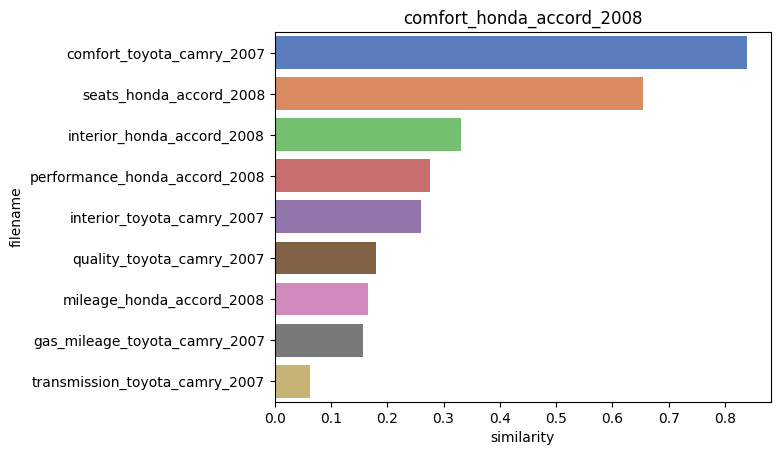

In [ ]:
# 유사도 높은 순으로 정렬 후 시각화
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 첫 번째 문서와 타 문서 간 유사도가 큰 순으로 정렬한 인덱스를 추출하되 자기자신은 제외
sorted_index = similarity_pair.argsort()[:, ::-1]
sorted_index = sorted_index[:, 1:]

# 유사도가 큰 순으로 hotel_indexed를 추출해 재정렬
hotel_sorted_indexes = hotel_indexes[sorted_index.reshape(-1)]

# 유사도가 큰 순으로 유사도 값을 재정렬하되 자기 자신은 제외
hotel_1_sim_value = np.sort(similarity_pair.reshape(-1))[::-1]
hotel_1_sim_value = hotel_1_sim_value[1:]

# 유사도가 큰 순으로 정렬된 인덱스와 유사도 값을 이용해 파일명과 유사도 값을 막대 그래프로 시각화
hotel_1_sim_df = pd.DataFrame()
hotel_1_sim_df['filename'] = document_df.iloc[hotel_sorted_indexes]['filename']
hotel_1_sim_df['similarity'] = hotel_1_sim_value

sns.barplot(x = 'similarity', y = 'filename', data = hotel_1_sim_df, palette = 'muted')
plt.title(comparison_docname)


------------
## 09. 한글 텍스트 처리 - 네이버 영화 평점 감성 분석

### 한글 NLP 처리의 어려움

- '띄어쓰기'
- '다양한 조사' : 어근 추출 등이 전처리 시 제거가 까다롭다

### KoNLPy 소개

KoNLPy : 파이썬의 대표적인 한글 형태소 패키지
- 형태소 : 단어로서 의미를 가지는 최소 단위
- 형태소 분석 (morphological analysis): 말뭉치를 이러한 형태소 어근 단위로 쪼개고 각 형태소에 품사 태깅 (POS tagging)을 부착하는 작업

- 꼬꼬마(Kkma), 한나눔(Hannanum), Komoran, 은전한닢 프로젝트 (Mecab), Twitter와 같은 5개 형태의 형태소 분석 모듈을 KoNLPy에서 모두 사용할 수 있다. (Mecab은 윈두우 환경에서는 구동되지 않는다)

In [10]:
pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 31.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 34.6 MB/s eta 0:00:00


### 데이터 로딩

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import pandas as pd

train_df = pd.read_csv('/content/drive/MyDrive/ESAA/OB/data/ratings/ratings.txt', sep = '\t')
train_df.head(3)

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1


label 값은 0과 1 두 개를 갖는다. 1은 긍정, 0은 부정 감성이다.

In [7]:
train_df['label'].value_counts()

label
1    100000
0    100000
Name: count, dtype: int64

- 0과 1의 비율이 균등하다.
- document 칼럼에 null값이 일부 존재하므로 이 값은 공백으로 변환한다.
- 문자가 아닌 숫자는 단어적인 의미로 부족하므로 정규표현식 모듈인 re를 사용하여 공백으로 변환한다.
- 테스트 데이터 세트에도 동일한 가공을 수행한다.

In [9]:
import re

train_df = train_df.fillna(' ')

# 정규 표현식을 이용해 숫자를 공백으로 변경 (정규 표현식으로 \d는 숫자를 의미함.)
train_df['document'] = train_df['document'].apply(lambda x : re.sub(r"\d+", " ", x))

# 테스트 데이터 세트를 로딩하고 동일하게 Null 및 숫자를 공백으로 변환
test_df = pd.read_csv('/content/drive/MyDrive/ESAA/OB/data/ratings/ratings_test.txt', sep='\t')
test_df = test_df.fillna(' ')
test_df['document'] = test_df['document'].apply(lambda x : re.sub(r"\d+", " ", x))

# id 칼럼 삭제 수행
train_df.drop('id', axis = 1, inplace = True)
test_df.drop('id', axis = 1, inplace = True)


TF-IDF 방식으로 단어 벡터화
1. 각 문장을 한글 형태소 분석을 통해 형태소 단어로 토큰화
2. 한글 형태소 엔진은 SNS 분석에 적합한 Twitter 클래스 이용
3. Twitter  객체의 morphs() 메서드를 이용하면 입력 인자로 들어온 문장을 형태소 단어 형태로 토큰화해 list 객체로 반환

In [11]:
from konlpy.tag import Twitter

twitter = Twitter()

def tw_tokenizer(text):
  # 입력 인자로 들어온 텍스트를 형태소 단어로 토큰화하여 리스트 형태로 반환
  tokens_ko = twitter.morphs(text)
  return tokens_ko

/usr/local/lib/python3.10/dist-packages/konlpy/tag/_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


사이킷런의 TfidfVectorizer를 이용하여 TF-IDF 피처 모델 생성

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Twitter 객체의 morphs() 객체를 이용한 tokenizer를 사용. ngram_range는 (1,2)
tfidf_vect = TfidfVectorizer(tokenizer=tw_tokenizer, ngram_range=(1,2), min_df=3, max_df=0.9)
tfidf_vect.fit(train_df['document'])
tfidf_matrix_train = tfidf_vect.transform(train_df['document'])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


로지스틱 호귀를 이용해 분류 기반의 감성 분석을 수행한다. 로지스틱 회귀의 하이퍼 파라미터 C의 최적화를 위해 GridSearchCV 이용

In [13]:
# 로지스틱 회귀를 이용해 감성 분석 분류 수행.
lg_clf = LogisticRegression(random_state=0)

# 파라미터 C 최적화를 위해 GridSearchCV를 이용.
params = {'C' : [1, 3.5, 4.5, 5.5, 10]}
grid_cv = GridSearchCV(lg_clf, param_grid=params, cv = 3 , scoring = 'accuracy', verbose = 1)
grid_cv.fit(tfidf_matrix_train, train_df['label'])
print(grid_cv.best_params_, round(grid_cv.best_score_, 4))

Fitting 3 folds for each of 5 candidates, totalling 15 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

{'C': 3.5} 0.8625


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


테스트 세트를 이용해 최종 감성 분석 예측 수행.
테스트 세트를 이용해 예측할 때는 학습할 때 적용한 TfidfVectorizer를 그대로 사용해야 한다. 그래야 학습 시 설정된 TfidfVectorizer의 피처 개수와 테스트 데이터를 TfidfVectorizer로 변환할 피처 개수가 같아진다.

In [14]:
from sklearn.metrics import accuracy_score

# 학습 데이터를 적용한 TfidfVectorizer를 이용해 테스트 데이터를 TF-IDF 값으로 피처 변환함.
tfidf_matrix_test = tfidf_vect.transform(test_df['document'])

# classifier는 GridSearchCV에서 최적 파라미터로 학습된 classifier를 그대로 이용
best_estimator = grid_cv.best_estimator_
preds = best_estimator.predict(tfidf_matrix_test)

print('Logistic Regression 정확도: ', accuracy_score(test_df['label'], preds))

Logistic Regression 정확도:  0.93902
